In [61]:
%load_ext rpy2.ipython
%matplotlib inline

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [62]:
#set up code
import sys
sys.path.append('../ProLib')
from ProteomicsUtility import utilities as PTUT
import ProtRank
import warnings
warnings.filterwarnings("ignore")
#define helphttp://localhost:8888/notebooks/calvin/new_data/analysis_427_2018.ipynb#ing function
import os
from tqdm import tqdm_notebook
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from adjustText import adjust_text
from matplotlib.lines import Line2D
from Bio import SeqIO
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
plt.style.use('ggplot')

In [63]:
#!gzip 927/proteinGroups_ibaq.txt

In [64]:
OUT_FOLDER = '427/'

In [65]:
#for n in df['Peptide counts (razor+unique)']:
#    print(str(n),'n')
#    print(str(n).split(';')[0])

In [66]:
df = pd.read_csv('427/proteinGroups_ibaq.txt.gz',sep='\t')
df['Peptide counts (razor+unique)']=df['Peptide counts (razor+unique)'].fillna('0')
df['Peptide counts (razor+unique)']=[str(n) for n in df['Peptide counts (razor+unique)']]
df = PTUT.clean_df(df, score=-1, unique_pep_threshold=-1)

starting from: (7201, 1507)
removed  256 Protein Groups by: Only identified by site
tot  256  entries removed
---------------
removed  68 Protein Groups by: Reverse
tot  324  entries removed
---------------
removed  147 Protein Groups by: Potential contaminant
tot  471  entries removed
---------------
Score
nothing removed
---------------
Peptide counts (razor+unique)
nothing removed
---------------


In [15]:
df.head()

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,unique_int
331,Tb427_000023800.1-p1;Tb427_000012500.1-p1;Tb42...,Tb427_000023800.1-p1;Tb427_000012500.1-p1;Tb42...,4;4;4;4;3;3,1;1;1;1;1;1,1;1;1;1;1;1,Tb427_000023800.1-p1 | transcript=Tb427_000023...,6,4,1,1,...,331,7008;49807;57657;106136,False;False;True;False,7818;7819;54729;63287;118037,233629;233630;233631;233632;233633;233634;2336...,379223;379224;379225;379226;379227;379228;3792...,379238;2310614;2695267;4797106,NaN,NaN,1
333,Tb427_000007800.1-p1,Tb427_000007800.1-p1,10,1,0,Tb427_000007800.1-p1 | transcript=Tb427_000007...,1,10,1,0,...,333,10825;20423;38406;46230;51872;60391;64236;7606...,False;True;False;False;False;False;False;False...,12065;22514;42213;50832;57065;66237;70505;8531...,360275;360276;360277;360278;360279;360280;3602...,584511;584512;584513;584514;584515;584516;5845...,584535;985122;1771971;2122335;2425468;2797030;...,NaN,NaN,1
337,Tb427_000009200.1-p1;Tb427_000316500.1-p1;Tb42...,Tb427_000009200.1-p1,12;4;3;3;3;1,3;0;2;0;0;0,3;0;2;0;0;0,Tb427_000009200.1-p1 | transcript=Tb427_000009...,6,12,3,3,...,337,17198;22015;31472;44990;44991;47332;48131;5466...,False;False;False;True;True;True;False;False;F...,18934;24227;34658;49496;49497;49498;52024;5290...,518764;518765;518766;518767;518768;518769;5187...,837230;837231;837232;837233;837234;837235;8372...,837239;1046244;1457295;2072461;2072695;2172369...,327;328;329;330,53;78;80;94,3
338,Tb427_000025300.1-p1;Tb427_000015700.1-p1;Tb42...,Tb427_000025300.1-p1;Tb427_000015700.1-p1;Tb42...,15;15;15;14;2;2,15;15;15;14;2;2,2;2;2;2;0;0,Tb427_000025300.1-p1 | transcript=Tb427_000025...,6,15,15,2,...,338,5744;10825;22217;29144;38406;46230;51872;60391...,True;True;True;True;True;True;True;True;True;T...,6295;12065;24437;32137;42213;50832;57065;66237...,193241;193242;193243;193244;193245;193246;1932...,314153;314154;314155;314156;314157;314158;3141...,314156;584535;1051481;1350624;1771971;2122335;...,NaN,NaN,15
339,Tb427_000009700.1-p1,Tb427_000009700.1-p1,10,4,2,Tb427_000009700.1-p1 | transcript=Tb427_000009...,1,10,4,2,...,339,14942;29200;49388;75357;93569;102729;106211;10...,True;False;False;False;False;True;False;True;F...,16445;32197;54273;84545;84546;104087;104088;11...,453929;847001;847002;847003;847004;847005;8470...,732595;1352931;1352932;1352933;1352934;1352935...,732595;1352937;2286247;3493513;4180602;4614058...,322;323,74;109,4


In [17]:
df[df['Protein IDs'].str.contains('Tb427_000023800.1-p1')]
#gene-Tb427.BES40.16

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,unique_int
331,Tb427_000023800.1-p1;Tb427_000012500.1-p1;Tb42...,Tb427_000023800.1-p1;Tb427_000012500.1-p1;Tb42...,4;4;4;4;3;3,1;1;1;1;1;1,1;1;1;1;1;1,Tb427_000023800.1-p1 | transcript=Tb427_000023...,6,4,1,1,...,331,7008;49807;57657;106136,False;False;True;False,7818;7819;54729;63287;118037,233629;233630;233631;233632;233633;233634;2336...,379223;379224;379225;379226;379227;379228;3792...,379238;2310614;2695267;4797106,NaN,NaN,1


In [18]:
bsf_cols = [n for n in  list(df.columns) if 'iBAQ H BSF' in n]
bsf = df[bsf_cols]
bsf.columns = [n.split(' ')[-1] for n in bsf.columns]
bsf_cols = bsf.columns
pcf_cols = [n for n in  list(df.columns) if 'iBAQ H PCF' in n]
pcf = df[pcf_cols]
pcf.columns = [n.split(' ')[-1] for n in pcf.columns]
pcf_cols = pcf.columns
bsf = bsf.replace(0,np.nan)
pcf = pcf.replace(0,np.nan)
bsf.head()
merge = pd.concat([bsf,pcf],axis=1)
merge.head()

,BSF_1,BSF_10,BSF_11,BSF_12,BSF_13,BSF_14,BSF_15,BSF_16,BSF_17,BSF_18,...,PCF_25,PCF_26,PCF_27,PCF_3,PCF_4,PCF_5,PCF_6,PCF_7,PCF_8,PCF_9
331,118020.0,NaN,NaN,NaN,NaN,NaN,NaN,93139.0,111540.0,80463.0,...,1713800.0,274790.0,1229900.0,NaN,179350.0,1436900.0,243710.0,NaN,115180.0,198340.0
333,NaN,28492.0,138360.0,112730.0,3914.6,51808.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,2794000.0,2453300.0,4602600.0,1691800.0,2220200.0,4181700.0,6813400.0,932160.0,3270100.0,6416500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,1588900.0,1923800.0,1512200.0,990880.0,1724500.0,1873600.0,1415700.0,1532700.0,1403500.0,1856300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,41693.0,30556.0,27642.0,26150.0,22228.0,29214.0,22363.0,50565.0,52579.0,60355.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#merge.loc[168]

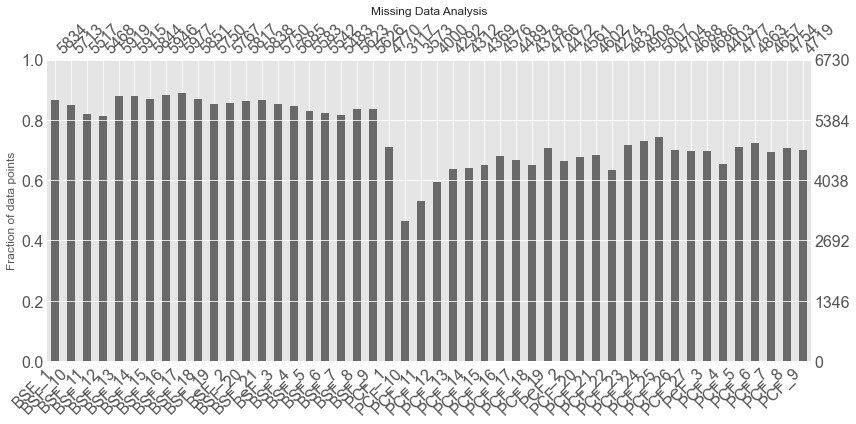

In [20]:
import missingno as msno
#visualization of missing data
ax=msno.bar(merge,figsize=(12, 6))
plt.title('Missing Data Analysis', size=12)
ax.set_ylabel('Fraction of data points',size=12)
plt.savefig(os.path.join(OUT_FOLDER,'1_missing_value.png'))
plt.tight_layout()
plt.show()

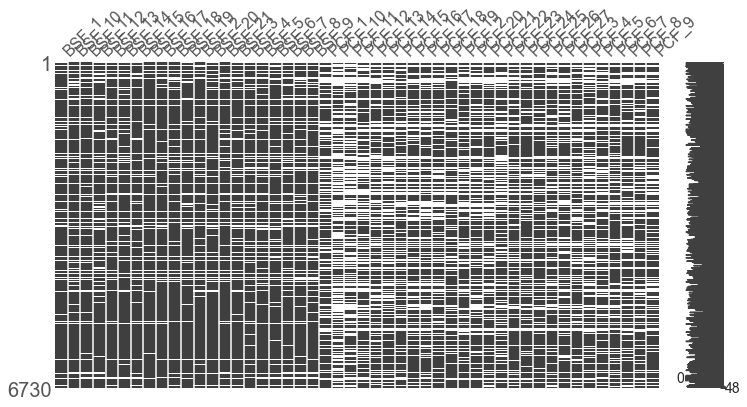

In [21]:
#print(data.shape)
msno.matrix(merge, figsize=(12, 6))
#plt.title('Missing Data')
plt.savefig(os.path.join(OUT_FOLDER,'missing_value_matrix.png'))
plt.show()

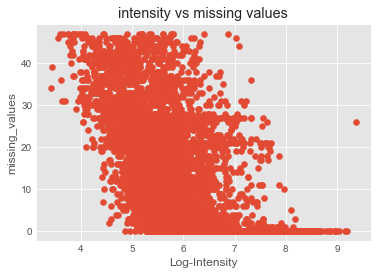

In [22]:
mean_intesity = np.log10(merge.mean(axis=1))
na_sum = merge.isna().sum(axis=1).astype(int)
plt.scatter(mean_intesity,na_sum)
plt.xlabel('Log-Intensity')
plt.ylabel('missing_values')
plt.title('intensity vs missing values')
plt.show()

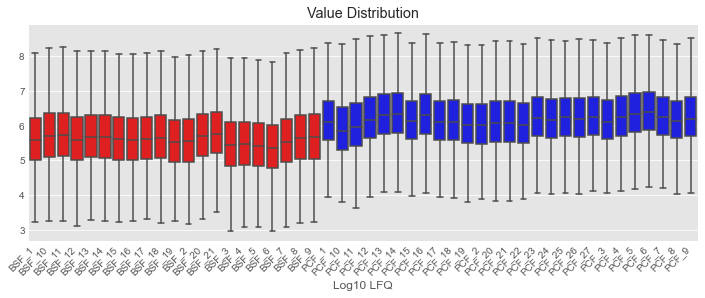

In [23]:
palette=['r']*len(bsf_cols)+['b']*len(pcf_cols)
palette_g = ['r','b']
color_dictionary = {'r':'BSF','b':'PCF'}


fig,ax=plt.subplots(figsize=(12,4))
sns.boxplot(data=np.log10(merge),showfliers=False,palette=palette,ax=ax)
plt.title('Value Distribution')
plt.xlabel('Log10 LFQ')
plt.xticks(rotation=45,ha='right')
plt.savefig(os.path.join(OUT_FOLDER,'4_value_distribution_box.png'))
plt.show()

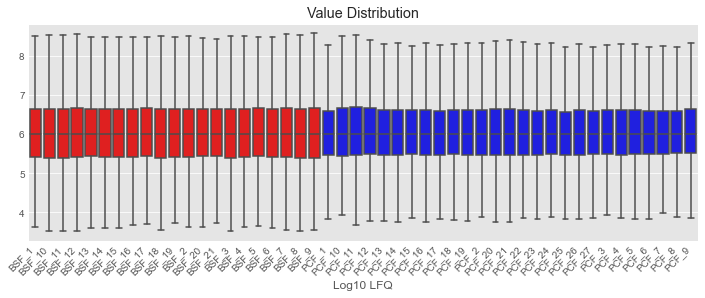

In [24]:
#https://codereview.stackexchange.com/questions/25417/is-there-a-better-way-to-make-a-function-silent-on-need
class NoStdStreams(object):
    def __init__(self, stdout = None, stderr = None):
        self.devnull = open(os.devnull,'w')
        self._stdout = stdout or self.devnull or sys.stdout
        self._stderr = stderr or self.devnull or sys.stderr

    def __enter__(self):
        self.old_stdout, self.old_stderr = sys.stdout, sys.stderr
        self.old_stdout.flush(); self.old_stderr.flush()
        sys.stdout, sys.stderr = self._stdout, self._stderr

    def __exit__(self, exc_type, exc_value, traceback):
        self._stdout.flush(); self._stderr.flush()
        sys.stdout = self.old_stdout
        sys.stderr = self.old_stderr
        self.devnull.close()

with NoStdStreams():
    merge_normed = PTUT.norm_loading(merge)

fig,ax=plt.subplots(figsize=(12,4))
sns.boxplot(data=np.log10(merge_normed),showfliers=False,palette=palette,ax=ax)
plt.title('Value Distribution')
plt.xlabel('Log10 LFQ')
plt.xticks(rotation=45,ha='right')
plt.savefig(os.path.join(OUT_FOLDER,'4_value_distribution_box.png'))
plt.show()

In [25]:
#merge_normed['bsf_median']=merge_normed[bsf_cols].median(axis=1,skipna=True)
#merge_normed['pcf_median']=merge_normed[pcf_cols].median(axis=1,skipna=True)
#merge_normed.head()

In [26]:
merge_normed=merge_normed.replace(0,np.nan)

In [27]:
log_merge_normed = np.log10(merge_normed)
log_merge_normed.head()

,BSF_1,BSF_10,BSF_11,BSF_12,BSF_13,BSF_14,BSF_15,BSF_16,BSF_17,BSF_18,...,PCF_25,PCF_26,PCF_27,PCF_3,PCF_4,PCF_5,PCF_6,PCF_7,PCF_8,PCF_9
331,5.496575,NaN,NaN,NaN,NaN,NaN,NaN,5.389266,5.446529,5.256085,...,6.004892,5.25283,5.842524,NaN,5.01989,5.835581,5.01457,NaN,4.940163,5.104586
333,NaN,4.747959,5.421828,5.461832,3.929298,5.061565,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,6.870845,6.682986,6.943821,6.638142,6.683002,6.968521,7.236157,6.389625,6.913659,7.157787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,6.625716,6.577396,6.460427,6.405814,6.573273,6.619845,6.553765,6.605592,6.546311,6.619137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,5.044682,4.778332,4.722387,4.827265,4.683511,4.812760,4.752323,5.123985,5.119911,5.131202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
merge_normed_BSF = merge_normed[[n for n in merge_normed.columns if n.startswith('BSF_')]]
merge_normed_PCF = merge_normed[[n for n in merge_normed.columns if n.startswith('PCF_')]]
#log_merge_normed_BSF_m1=log_merge_normed_BSF-1
#log_merge_normed_PCF_m1=log_merge_normed_PCF-1

count    6730.000000
mean        3.102823
std         6.080806
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        21.000000
dtype: float64


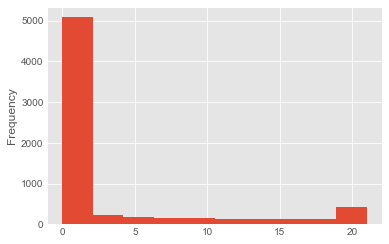

In [30]:
na_bsf = merge_normed_BSF.isna().sum(axis=1)
na_bsf.plot(kind='hist')
print(na_bsf.describe())
#log_merge_normed_BSF[na_bsf>10]=np.nan

count    6730.000000
mean        8.939227
std         9.827779
min         0.000000
25%         0.000000
50%         4.000000
75%        17.000000
max        27.000000
dtype: float64


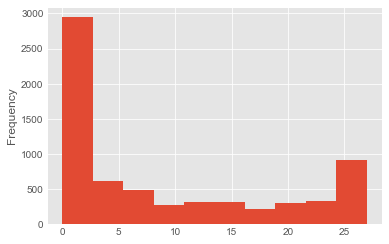

In [31]:
na_pcf = merge_normed_PCF.isna().sum(axis=1)
na_pcf.plot(kind='hist')
print(na_pcf.describe())
#log_merge_normed_PCF[na_pcf>19]=np.nan

In [34]:
def get_random(in_col, strategy):
    if strategy == 'small':
        mean_random = in_col[in_col>0].min()
        std_random = mean_random*0.05
        random_values = np.random.normal(mean_random, 
                                         scale=std_random, 
                                         size=in_col.shape[0])
    if strategy == 'median':
        pass
        
    return  random_values

#add a small random value to each element
#of a cloumn, optionally plots the distribution
#of the random values
def impute(in_col, ax=False, strategy='small'):
    random_values = get_random(in_col, strategy=strategy)
    if ax:
        np.log10(pd.Series(random_values)).plot(kind='hist',histtype='step', 
                          density=True,ax=ax,label=in_col.name)  
    
    fake_col = in_col.copy()
    fake_col = fake_col+random_values
    index = in_col[in_col==0].index.values 
    in_col.loc[index] = fake_col.loc[index] 
    return in_col  


In [35]:
log_merge_normed.head()

,BSF_1,BSF_10,BSF_11,BSF_12,BSF_13,BSF_14,BSF_15,BSF_16,BSF_17,BSF_18,...,PCF_25,PCF_26,PCF_27,PCF_3,PCF_4,PCF_5,PCF_6,PCF_7,PCF_8,PCF_9
331,5.496575,NaN,NaN,NaN,NaN,NaN,NaN,5.389266,5.446529,5.256085,...,6.004892,5.25283,5.842524,NaN,5.01989,5.835581,5.01457,NaN,4.940163,5.104586
333,NaN,4.747959,5.421828,5.461832,3.929298,5.061565,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,6.870845,6.682986,6.943821,6.638142,6.683002,6.968521,7.236157,6.389625,6.913659,7.157787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,6.625716,6.577396,6.460427,6.405814,6.573273,6.619845,6.553765,6.605592,6.546311,6.619137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,5.044682,4.778332,4.722387,4.827265,4.683511,4.812760,4.752323,5.123985,5.119911,5.131202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
for n in log_merge_normed.columns:
    log_merge_normed[n] = impute(log_merge_normed[n].fillna(0))

In [37]:
imputed_X = log_merge_normed.copy()

In [38]:
#imputed_X.loc[[172]].plot(kind='bar')

In [39]:
#fig,ax=plt.subplots(figsize=(8,8))
#imputed_X.plot(kind='scatter',x='log_pcf_median',y='log_bsf_median',ax=ax)
#imputed_X.loc[[172]].plot(kind='scatter',x='log_pcf_median',y='log_bsf_median',ax=ax,c='r')

In [40]:
imputed_X['bsf_median']=imputed_X[bsf_cols].median(axis=1)
imputed_X['pcf_median']=imputed_X[pcf_cols].median(axis=1)

In [41]:
imputed_X['rank_bsf_median']=imputed_X['bsf_median'].rank(method='min')
imputed_X['rank_pcf_median']=imputed_X['pcf_median'].rank(method='min')

<AxesSubplot:xlabel='bsf_median', ylabel='pcf_median'>

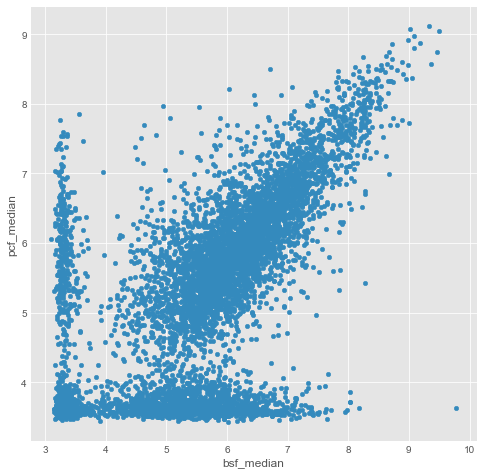

In [55]:
fig,ax=plt.subplots(figsize=(8,8))
imputed_X.plot(kind='scatter',x='bsf_median',y='pcf_median',ax=ax)
#imputed_X.loc[[172]].plot(kind='scatter',x='bsf_median',y='pcf_median',ax=ax,c='r')

<AxesSubplot:xlabel='rank_bsf_median', ylabel='rank_pcf_median'>

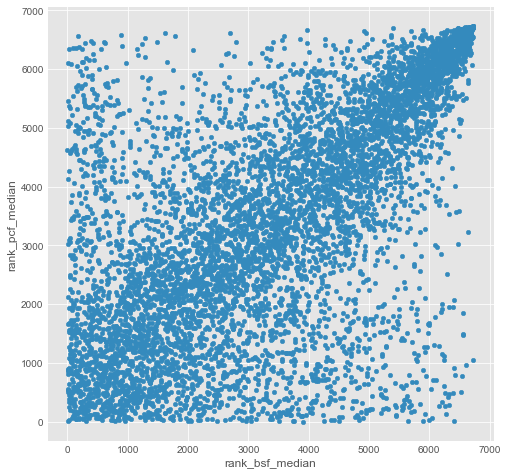

In [44]:
fig,ax=plt.subplots(figsize=(8,8))
imputed_X.plot(kind='scatter',x='rank_bsf_median',y='rank_pcf_median',ax=ax)
#imputed_X.loc[[172]].plot(kind='scatter',x='rank_bsf_median',y='rank_pcf_median',ax=ax,c='r')

In [45]:
df.head()

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,unique_int
331,Tb427_000023800.1-p1;Tb427_000012500.1-p1;Tb42...,Tb427_000023800.1-p1;Tb427_000012500.1-p1;Tb42...,4;4;4;4;3;3,1;1;1;1;1;1,1;1;1;1;1;1,Tb427_000023800.1-p1 | transcript=Tb427_000023...,6,4,1,1,...,331,7008;49807;57657;106136,False;False;True;False,7818;7819;54729;63287;118037,233629;233630;233631;233632;233633;233634;2336...,379223;379224;379225;379226;379227;379228;3792...,379238;2310614;2695267;4797106,NaN,NaN,1
333,Tb427_000007800.1-p1,Tb427_000007800.1-p1,10,1,0,Tb427_000007800.1-p1 | transcript=Tb427_000007...,1,10,1,0,...,333,10825;20423;38406;46230;51872;60391;64236;7606...,False;True;False;False;False;False;False;False...,12065;22514;42213;50832;57065;66237;70505;8531...,360275;360276;360277;360278;360279;360280;3602...,584511;584512;584513;584514;584515;584516;5845...,584535;985122;1771971;2122335;2425468;2797030;...,NaN,NaN,1
337,Tb427_000009200.1-p1;Tb427_000316500.1-p1;Tb42...,Tb427_000009200.1-p1,12;4;3;3;3;1,3;0;2;0;0;0,3;0;2;0;0;0,Tb427_000009200.1-p1 | transcript=Tb427_000009...,6,12,3,3,...,337,17198;22015;31472;44990;44991;47332;48131;5466...,False;False;False;True;True;True;False;False;F...,18934;24227;34658;49496;49497;49498;52024;5290...,518764;518765;518766;518767;518768;518769;5187...,837230;837231;837232;837233;837234;837235;8372...,837239;1046244;1457295;2072461;2072695;2172369...,327;328;329;330,53;78;80;94,3
338,Tb427_000025300.1-p1;Tb427_000015700.1-p1;Tb42...,Tb427_000025300.1-p1;Tb427_000015700.1-p1;Tb42...,15;15;15;14;2;2,15;15;15;14;2;2,2;2;2;2;0;0,Tb427_000025300.1-p1 | transcript=Tb427_000025...,6,15,15,2,...,338,5744;10825;22217;29144;38406;46230;51872;60391...,True;True;True;True;True;True;True;True;True;T...,6295;12065;24437;32137;42213;50832;57065;66237...,193241;193242;193243;193244;193245;193246;1932...,314153;314154;314155;314156;314157;314158;3141...,314156;584535;1051481;1350624;1771971;2122335;...,NaN,NaN,15
339,Tb427_000009700.1-p1,Tb427_000009700.1-p1,10,4,2,Tb427_000009700.1-p1 | transcript=Tb427_000009...,1,10,4,2,...,339,14942;29200;49388;75357;93569;102729;106211;10...,True;False;False;False;False;True;False;True;F...,16445;32197;54273;84545;84546;104087;104088;11...,453929;847001;847002;847003;847004;847005;8470...,732595;1352931;1352932;1352933;1352934;1352935...,732595;1352937;2286247;3493513;4180602;4614058...,322;323,74;109,4


In [46]:
temp = PTUT.mod_df(imputed_X.join(df,how='left'))
temp['Gene_acc']=np.arange(temp.shape[0])
temp.rename({'desc':'Desc'},axis=1,inplace=True)
temp.head()

,BSF_1,BSF_10,BSF_11,BSF_12,BSF_13,BSF_14,BSF_15,BSF_16,BSF_17,BSF_18,...,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,unique_int,Gene_id,Desc,Gene_acc
331,5.496575,3.303853,3.236385,3.287249,3.001839,3.197840,2.939450,5.389266,5.446529,5.256085,...,7818;7819;54729;63287;118037,233629;233630;233631;233632;233633;233634;2336...,379223;379224;379225;379226;379227;379228;3792...,379238;2310614;2695267;4797106,NaN,NaN,1,Tb427_000023800.1-p1,"BT1 family, putative",0
333,3.369344,4.747959,5.421828,5.461832,3.929298,5.061565,3.192443,2.900611,3.257037,3.494379,...,12065;22514;42213;50832;57065;66237;70505;8531...,360275;360276;360277;360278;360279;360280;3602...,584511;584512;584513;584514;584515;584516;5845...,584535;985122;1771971;2122335;2425468;2797030;...,NaN,NaN,1,Tb427_000007800.1-p1,"Trypanosomal VSG domain containing protein, pu...",1
337,6.870845,6.682986,6.943821,6.638142,6.683002,6.968521,7.236157,6.389625,6.913659,7.157787,...,18934;24227;34658;49496;49497;49498;52024;5290...,518764;518765;518766;518767;518768;518769;5187...,837230;837231;837232;837233;837234;837235;8372...,837239;1046244;1457295;2072461;2072695;2172369...,327;328;329;330,53;78;80;94,3,Tb427_000009200.1-p1,"hypothetical protein, conserved",2
338,6.625716,6.577396,6.460427,6.405814,6.573273,6.619845,6.553765,6.605592,6.546311,6.619137,...,6295;12065;24437;32137;42213;50832;57065;66237...,193241;193242;193243;193244;193245;193246;1932...,314153;314154;314155;314156;314157;314158;3141...,314156;584535;1051481;1350624;1771971;2122335;...,NaN,NaN,15,Tb427_000025300.1-p1,ESAG2 [Source:UniProtKB/TrEMBL;Acc:Q8WPR1],3
339,5.044682,4.778332,4.722387,4.827265,4.683511,4.812760,4.752323,5.123985,5.119911,5.131202,...,16445;32197;54273;84545;84546;104087;104088;11...,453929;847001;847002;847003;847004;847005;8470...,732595;1352931;1352932;1352933;1352934;1352935...,732595;1352937;2286247;3493513;4180602;4614058...,322;323,74;109,4,Tb427_000009700.1-p1,Trypanosome variant surface glycoprotein (A-ty...,4


In [47]:
temp['Gene_id'] = [n.split('.')[0] for n in temp['Gene_id']]
temp['Gene_id'].value_counts()

Tb427_110033600    1
Tb427_110029300    1
Tb427_100146700    1
Tb427_070030200    1
Tb427_100090100    1
                  ..
Tb427_100083700    1
Tb427_020026900    1
Tb427_030039000    1
Tb427_100134500    1
Tb427_070006000    1
Name: Gene_id, Length: 6730, dtype: int64

In [51]:
!mkdir -p 'web_data/E427'

In [52]:
temp[['Gene_acc','Gene_id','bsf_median',
      'pcf_median','rank_bsf_median','rank_pcf_median','Desc',
      'Protein IDs']].to_csv('web_data/E427/indata.csv',index=False)

In [53]:
#pcf_cols

In [54]:
temp2 = merge_normed.fillna(0)
temp2 = PTUT.mod_df(temp2.join(df,how='left'))

temp2['Gene_acc']=np.arange(temp2.shape[0])
temp2.rename({'desc':'Desc'},axis=1,inplace=True)
#temp2[list(bsf_cols)+list(pcf_cols)]=np.log10(temp2[list(bsf_cols)+list(pcf_cols)])

temp2[['Gene_acc','Gene_id']+list(bsf_cols)+list(pcf_cols)+['Desc','Protein IDs']].to_csv('web_data/E427/indata2.csv',index=False)



In [60]:
#import itertools
#iterable=([1,2,3,4,5,6])
#list(itertools.combinations(iterable, 3))